In [1]:
import pandas as pd
import regex as re
import string 
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# preprocessing functions
# preprocessing
stop_words = stopwords.words('english')

#add punctuation char's to stopwords list
stop_words += list(string.punctuation) # <-- contains !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
#add integers
stop_words += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '’', 'amp', "'", '``', "''", '“' , '”', '...', "'s", "n't", 'covid19', 'coronavirus']

def remove_urls(dataframe):
#replace URL of a text
    dataframe['text'] = dataframe['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex=True)

# tokenize
# remove stop words, puncutation, lower()
def tokenize_lowercase(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed


# lemmatize text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]



In [3]:
df = pd.read_csv('dataset-with-toxicity.csv') 
# df = df[:1000]

remove_urls(df)
df['text'] = df['text'].apply(tokenize_lowercase)
df['text'] = df['text'].apply(lemmatize_text)

In [4]:


all_words = [item for sublist in df['text'] for item in sublist]
tweet_lengths = [len(tokens) for tokens in df['text']]

vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

482429 words total, with a vocabulary size of 53148
Max tweet length is 74


C:\Users\jackc\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


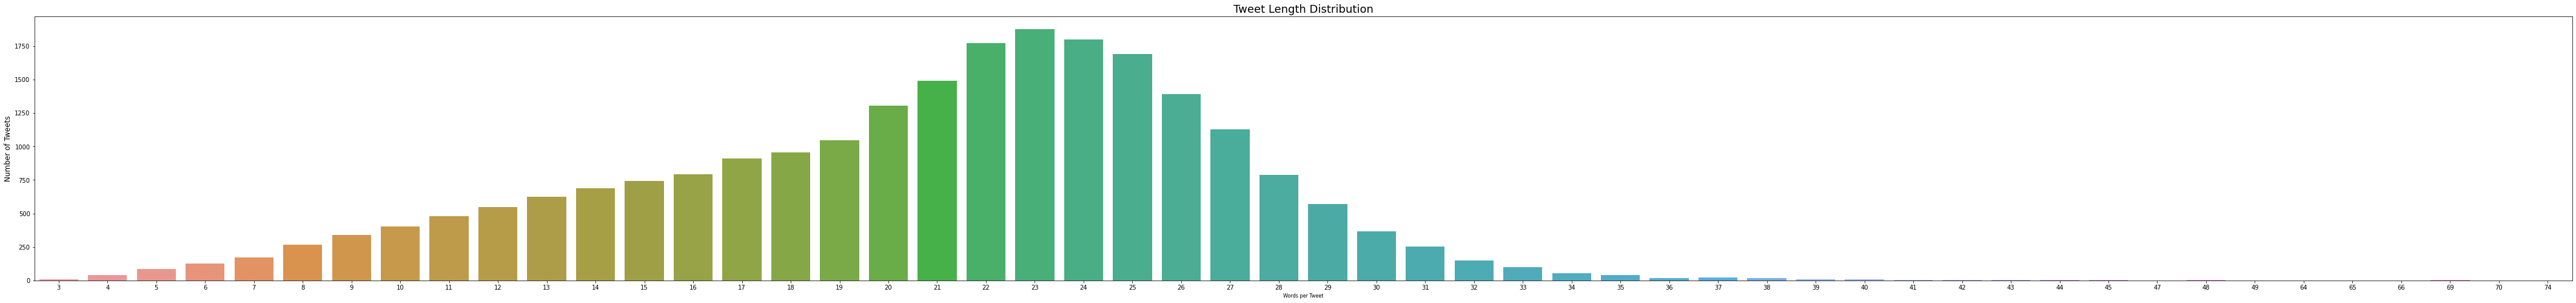

In [5]:
plt.figure(figsize = (75,8))
ax = sns.countplot(tweet_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 8)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()



In [6]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df['text'] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(30)

[('covid19', 14762),
 ('coronavirus', 8833),
 ('people', 2504),
 ('case', 2184),
 ('realdonaldtrump', 2120),
 ('u', 2024),
 ('pandemic', 1974),
 ('death', 1947),
 ('new', 1934),
 ('health', 1789),
 ('need', 1542),
 ('covid_19', 1521),
 ('today', 1505),
 ('state', 1502),
 ('country', 1426),
 ('trump', 1376),
 ('time', 1365),
 ('one', 1290),
 ('fight', 1288),
 ('help', 1287),
 ('day', 1253),
 ('say', 1243),
 ('response', 1158),
 ('patient', 1143),
 ('support', 1107),
 ('world', 1102),
 ('china', 1050),
 ('home', 1044),
 ('worker', 1043),
 ('via', 1025)]

In [7]:

#retrieve word and count from FreqDist tuples

most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

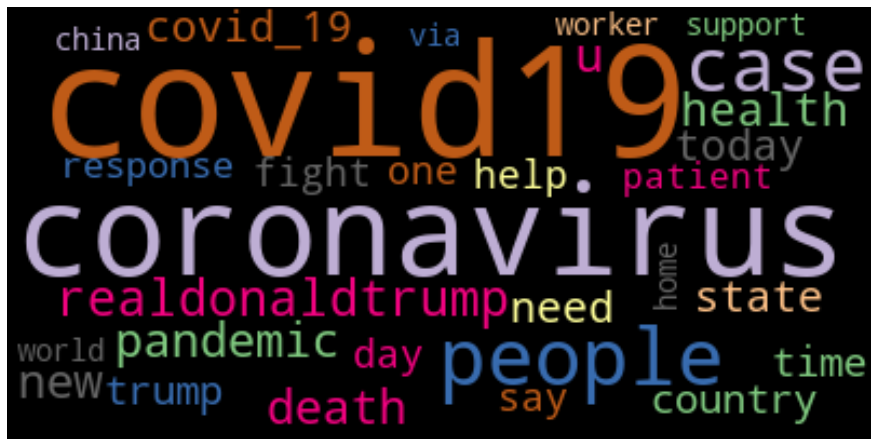

In [8]:
from wordcloud import WordCloud

#Create Word Cloud of top 30 words
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('top_30_cloud.png')

plt.show()

In [9]:

from gensim.corpora import Dictionary

#create dictionary
text_dict = Dictionary(df.text)

#view integer mappings
# text_dict.token2id

In [10]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['text']]

In [11]:
from gensim.models.ldamodel import LdaModel

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

[(0,
  '0.034*"case" + 0.024*"death" + 0.023*"covid19" + 0.014*"new" + 0.012*"april" + 0.011*"confirmed" + 0.010*"total" + 0.008*"2020" + 0.008*"positive" + 0.007*"coronavirus"'),
 (1,
  '0.030*"coronavirus" + 0.020*"covid19" + 0.015*"realdonaldtrump" + 0.009*"trump" + 0.007*"china" + 0.006*"american" + 0.006*"u" + 0.005*"people" + 0.005*"president" + 0.005*"say"'),
 (2,
  '0.013*"covid19" + 0.009*"coronavirus" + 0.006*"covid_19" + 0.006*"▶️" + 0.005*"minister" + 0.005*"fight" + 0.004*"stayhomestaysafe" + 0.004*"hospital" + 0.004*"india" + 0.003*"govt"'),
 (3,
  '0.046*"covid19" + 0.010*"coronavirus" + 0.007*"health" + 0.006*"people" + 0.006*"new" + 0.006*"home" + 0.005*"testing" + 0.005*"state" + 0.005*"patient" + 0.005*"worker"'),
 (4,
  '0.033*"covid19" + 0.010*"pandemic" + 0.008*"support" + 0.008*"coronavirus" + 0.007*"world" + 0.007*"fight" + 0.006*"together" + 0.006*"crisis" + 0.006*"response" + 0.005*"today"')]

In [12]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.098071  0.092312       1        1  32.712152
1      0.179785  0.065562       2        1  26.450898
4      0.097288 -0.094360       3        1  20.111388
2     -0.127939 -0.229417       4        1  11.232342
0     -0.247205  0.165902       5        1   9.493220, topic_info=                 Term         Freq        Total Category  logprob  loglift
164              case  1945.000000  1945.000000  Default  30.0000  30.0000
168             death  1857.000000  1857.000000  Default  29.0000  29.0000
93    realdonaldtrump  1914.000000  1914.000000  Default  28.0000  28.0000
55                new  1780.000000  1780.000000  Default  27.0000  27.0000
100             trump  1188.000000  1188.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
4697         recovery   125.342603   324.656328   Topic5  -5.9009   1.4029
807             state   158.330904  1495.147691   Topic5  -5.6673   0.1093
757              test   143.641829   924.044842   Topic5  -5.7647   0.4932
109          breaking   110.240447   437.590621   Topic5  -6.0293   0.9760
190           patient   107.482125  1052.696217   Topic5  -6.0547   0.0728

[348 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
358        5  0.978120        13
1695       5  0.978561        17
888        2  0.060396      2020
888        5  0.939765      2020
748        5  0.991620        21
...      ...       ...       ...
1810       1  0.669360         ⁦
1810       2  0.330486         ⁦
2348       4  0.998481        ▶️
23217      5  0.981576  ➡️states
8028       4  0.981586         👏

[543 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 3, 1])